### Importing Python libraries

In [2]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [3]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import chart_studio
chart_studio.tools.set_credentials_file(username='abbas_99', api_key='KejnSwEHG8wxSkSZRfEF')
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

In [4]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [5]:
### Importing the data

### Importing the data

> Let's import the dataset and make of a copy of the source file for this analysis. <br> The dataset contains 1,470 rows and 35 columns.

In [6]:
# Read the dataset
data_df=pd.read_csv('data.csv')
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
# Shape of data:
print("Shape of dataframe is: {}".format(data_df.shape))

Shape of dataframe is: (1470, 35)


In [8]:
# Make a copy of the original sourcefile
df_HR = data_df.copy()

### Data Description and Exploratory Visualisations
> In this section, we will provide data visualizations that summarizes or extracts relevant characteristics of features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

#### Overview

In [9]:
# Dataset columns
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Dataset header
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


> The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [11]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [12]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> The data provided has no missing values. In HR Analytics, employee data is unlikely to feature large ratio of missing values as HR Departments typically have all personal and employment data on-file. However, the type of documentation data is being kept in (i.e. whether it is paper-based, Excel spreadhsheets, databases, etc) has a massive impact on the accuracy and the ease of access to the HR data.

#### Numerical features overview

In [13]:
df_HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


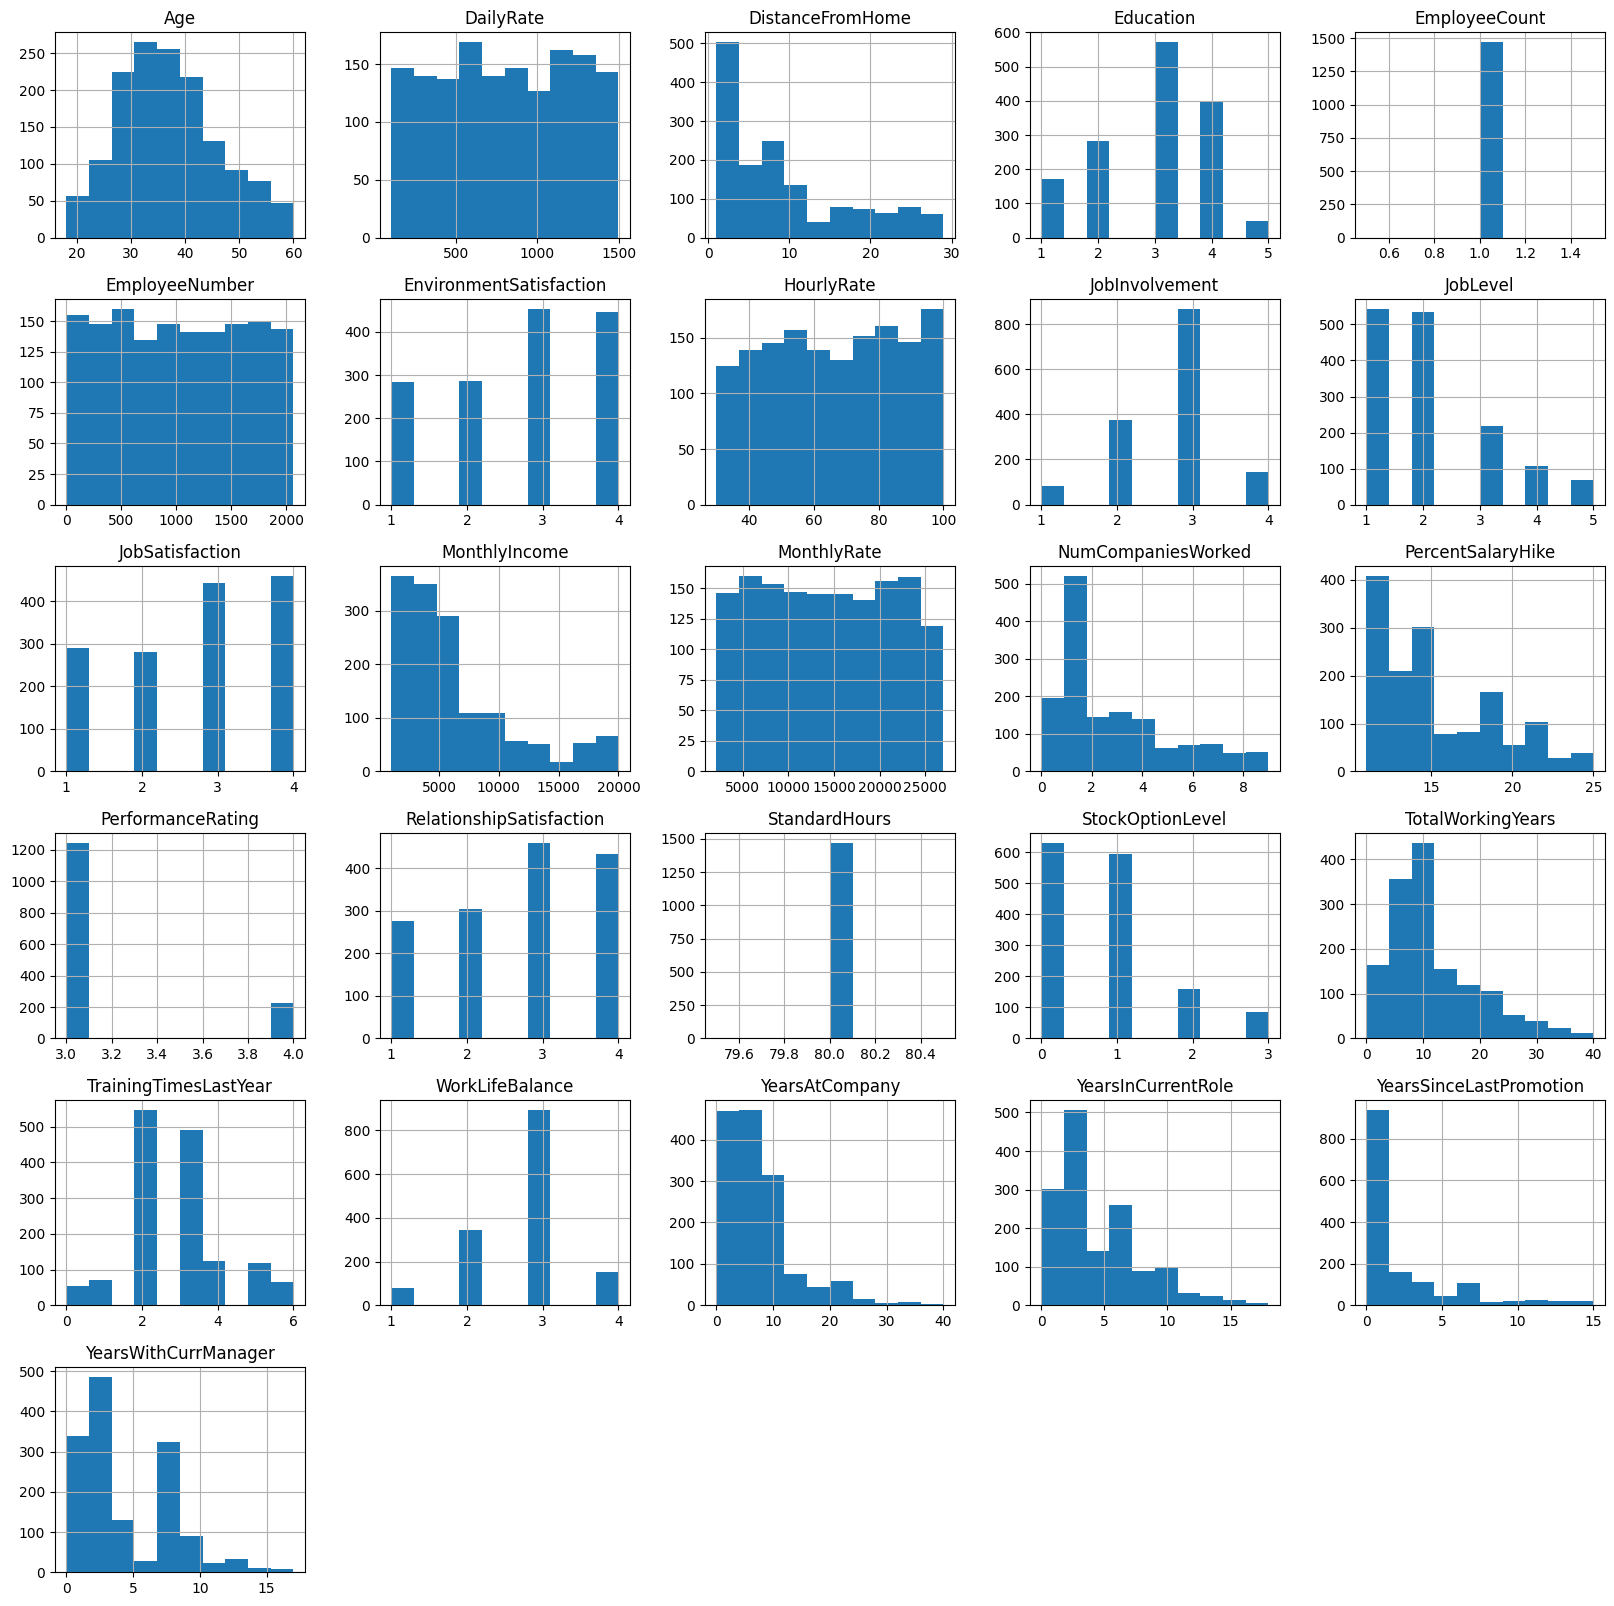

In [14]:
df_HR.hist(figsize=(20,20))
plt.show()

> A few observations can be made based on the information and histograms for numerical features:
 - Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
 - Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
 - EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
 - Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

### Feature distribution by target attribute

#### Age

> The age distributions for Active and Ex-employees only differs by one year. <br>
The average age of ex-employees is **33.6** years old, while **37.6** is the average age for current employees.

In [15]:
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


> Let's create a kernel density estimation (KDE) plot colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

In [16]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'Age']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Age Distribution in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[15, 60], dtick=5))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

#### Education
> Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other. Here, I plot the normalized % of Leavers for each Education Field.

In [17]:
# Education Field of employees
df_HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [18]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_HR['EducationField'].unique()):
    ratio = df_HR[(df_HR['EducationField']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.iplot(kind='bar',title='Leavers by Education Field (%)')

#### Gender
> Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17.0% for Males and 14.8% for Females.

In [19]:
# Gender of employees
df_HR['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [20]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_HR[(df_HR['Attrition'] == 'Yes') & (
    df_HR['Gender'] == 'Male')].shape[0] / df_HR[df_HR['Gender'] == 'Male'].shape[0])*100, (df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['Gender'] == 'Female')].shape[0] / df_HR[df_HR['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


In [21]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df_HR['Gender'].unique()):
    ratio = df_HR[(df_HR['Gender']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G.iplot(kind='bar',title='Leavers by Gender (%)')

#### Marital Status
> The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). <br>
Single employees show the largest proportion of leavers at 25%.

In [22]:
# Marital Status of employees
df_HR['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [23]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df_HR['MaritalStatus'].unique()):
    ratio = df_HR[(df_HR['MaritalStatus']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.iplot(kind='bar',title='Leavers by Marital Status (%)')

#### Distance from Home
> Distance from home for employees to get to work varies from 1 to 29 miles. There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

In [24]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [25]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


In [26]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'DistanceFromHome']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'DistanceFromHome']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(
    title='Distance From Home Distribution in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 30], dtick=2))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

#### Department
> The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [27]:
# The organisation consists of several departments
df_HR['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [28]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(df_HR['Department'].unique()):
    ratio = df_HR[(df_HR['Department']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_DF = df_Department.groupby(by="Department").sum()
df_DF.iplot(kind='bar',title='Leavers by Department (%)')

#### Role and Work Conditions
> A preliminary look at the relationship between Business Travel frequency and Attrition Status shows that there is a largest normalized proportion of Leavers for employees that travel "frequently". Travel metrics associated with Business Travel status were not disclosed (i.e. how many hours of Travel is considered "Frequent").

In [29]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df_HR['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [30]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df_HR['BusinessTravel'].unique()):
    ratio = df_HR[(df_HR['BusinessTravel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.iplot(kind='bar',title='Leavers by Business Travel (%)')

> Several Job Roles are listed in the dataset: Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

In [31]:
# Employees in the database have several roles on-file
df_HR['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [32]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df_HR['JobRole'].unique()):
    ratio = df_HR[(df_HR['JobRole']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
df_JR.iplot(kind='bar',title='Leavers by Job Role (%)')

> Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [33]:
df_HR['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [34]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df_HR['JobLevel'].unique()):
    ratio = df_HR[(df_HR['JobLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
df_JL.iplot(kind='bar',title='Leavers by Job Level (%)')

> A ranking is associated to the employee's Job Involvement :1 'Low' 2 'Medium' 3 'High' 4 'Very High'. The plot below indicates a negative correlation with the Job Involvement of an employee and the Attrition Status. In other words, employees with higher Job Involvement are less likely to leave.

In [35]:
df_HR['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [36]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df_HR['JobInvolvement'].unique()):
    ratio = df_HR[(df_HR['JobInvolvement']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
df_JI.iplot(kind='bar',title='Leavers by Job Involvement (%)')

> The data indicates that employees may have access to some Training. A feature indicates how many years it's been since the employee attended such training.

In [37]:
print("Number of training times last year varies from {} to {} years.".format(
    df_HR['TrainingTimesLastYear'].min(), df_HR['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


In [38]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'TrainingTimesLastYear']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'TrainingTimesLastYear']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(
    title='Training Times Last Year metric in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 6], dtick=1))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

> There is a feature for the number of companies the employee has worked at. <br>
> 0 likely indicates that according to records, the employee has only worked at this company

In [39]:
df_HR['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [40]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df_HR['NumCompaniesWorked'].unique()):
    ratio = df_HR[(df_HR['NumCompaniesWorked']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
df_NC.iplot(kind='bar',title='Leavers by Num Companies Worked (%)')

#### Years at the Company

In [41]:
print('Average Number of Years at the company for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    df_HR[df_HR['Attrition'] == 'No']['YearsAtCompany'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['YearsAtCompany'].mean()))

Average Number of Years at the company for currently active employees: 7.37 miles and ex-employees: 5.13 years


In [42]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


In [43]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years At Company in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 40], dtick=5))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [44]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df_HR['YearsInCurrentRole'].min(), df_HR['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


In [45]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsInCurrentRole']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsInCurrentRole']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years InCurrent Role in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 18], dtick=1))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [46]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df_HR['YearsSinceLastPromotion'].min(), df_HR['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


In [47]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsSinceLastPromotion']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsSinceLastPromotion']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years Since Last Promotion in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 15], dtick=1))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [48]:
print("Total working years varies from {} to {} years.".format(
    df_HR['TotalWorkingYears'].min(), df_HR['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


In [49]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'TotalWorkingYears']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'TotalWorkingYears']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Total Working Years in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 40], dtick=5))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

#### Years With Current Manager

In [50]:
print('Average Number of Years wit current manager for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    df_HR[df_HR['Attrition'] == 'No']['YearsWithCurrManager'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()))

Average Number of Years wit current manager for currently active employees: 4.37 miles and ex-employees: 2.85 years


In [51]:
print("Number of Years wit current manager varies from {} to {} years.".format(
    df_HR['YearsWithCurrManager'].min(), df_HR['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


In [52]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'YearsWithCurrManager']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsWithCurrManager']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(
    title='Years With Curr Manager in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 17], dtick=1))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

#### Work-Life Balance Score
> A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

In [54]:
df_HR['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [55]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df_HR['WorkLifeBalance'].unique()):
    ratio = df_HR[(df_HR['WorkLifeBalance']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WLB.iplot(kind='bar',title='Leavers by WorkLifeBalance (%)')

> All employees have a standard 80-hour work commitment

In [56]:
df_HR['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

> Some employees have overtime commitments. The data clearly show that there is significant larger portion of employees with OT that have left the company.

In [57]:
df_HR['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [58]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df_HR['OverTime'].unique()):
    ratio = df_HR[(df_HR['OverTime']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
df_OT.iplot(kind='bar',title='Leavers by OverTime (%)')

#### Pay/Salary Employee Information

In [ ]:
#### Pay/Salary Employee Information

In [59]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df_HR['HourlyRate'].min(), df_HR['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [60]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df_HR['DailyRate'].min(), df_HR['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [61]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df_HR['MonthlyRate'].min(), df_HR['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [62]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_HR['MonthlyIncome'].min(), df_HR['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


In [69]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'MonthlyIncome']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'MonthlyIncome']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Monthly Income by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 20000], dtick=2000))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [64]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    df_HR['PercentSalaryHike'].min(), df_HR['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


In [70]:
# Add histogram data
x1 = df_HR.loc[df_HR['Attrition'] == 'No', 'PercentSalaryHike']
x2 = df_HR.loc[df_HR['Attrition'] == 'Yes', 'PercentSalaryHike']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Percent Salary Hike by Attrition Status')
fig['layout'].update(xaxis=dict(range=[10, 26], dtick=1))
# Plot
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [66]:
print("Stock Option Levels varies from {} to {}.".format(
    df_HR['StockOptionLevel'].min(), df_HR['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [67]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 1)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 2)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 3)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


In [68]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df_HR['StockOptionLevel'].unique()):
    ratio = df_HR[(df_HR['StockOptionLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
df_SOL.iplot(kind='bar',title='Leavers by Stock Option Level (%)')

#### Employee Satisfaction and Performance Information
> Environment Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br> 
Proportion of Leaving Employees decreases as the Environment Satisfaction score increases.

In [71]:
df_HR['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [72]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['EnvironmentSatisfaction'].unique()):
    ratio = df_HR[(df_HR['EnvironmentSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
df_Env.iplot(kind='bar',title='Leavers by Environment Satisfaction (%)')

> Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br> 
Proportion of Leaving Employees decreases as the Job Satisfaction score increases.

In [73]:
# Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
df_HR['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [74]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['JobSatisfaction'].unique()):
    ratio = df_HR[(df_HR['JobSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.iplot(kind='bar',title='Leavers by Job Satisfaction (%)')

> Relationship Satisfaction was captured as: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.

In [75]:
df_HR['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [76]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['RelationshipSatisfaction'].unique()):
    ratio = df_HR[(df_HR['RelationshipSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.iplot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

> Employee Performance Rating was captured as: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

In [77]:
df_HR['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [78]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 3)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 4)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


In [79]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df_HR['PerformanceRating'].unique()):
    ratio = df_HR[(df_HR['PerformanceRating']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.iplot(kind='bar',title='Leavers by Performance Rating (%)')

### Target Variable: Attrition
> The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history. 

In [80]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [81]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [82]:
df_HR['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution')

> As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

> Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

### Correlation
> Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [83]:
# Find correlations with the target and sort
df_HR_trans = df_HR.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_13432\4110551566.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



> Let's plot a heatmap to visualize the correlation between Attrition and these factors.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13432\401974661.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

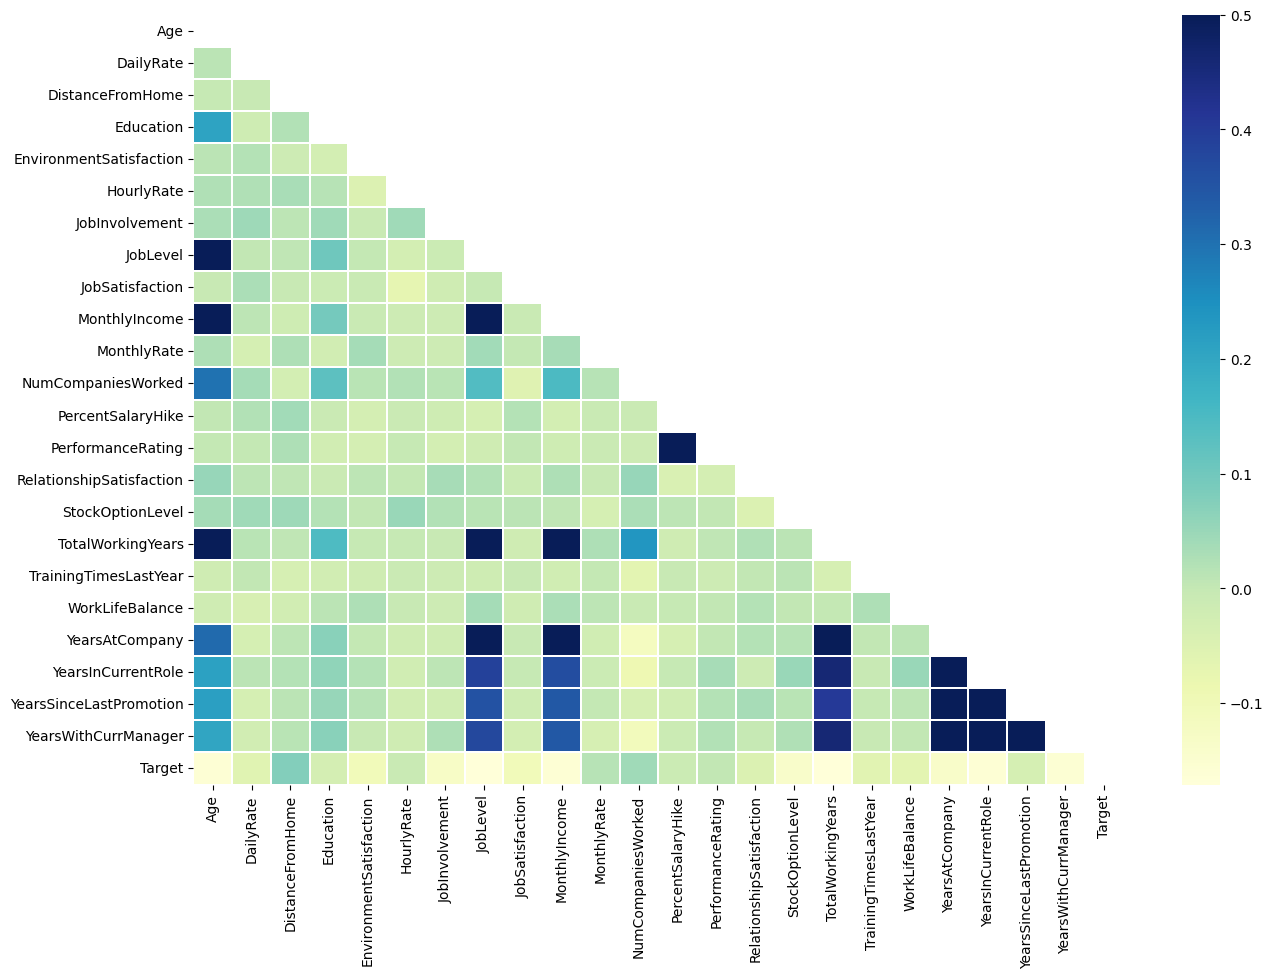

In [84]:
# Calculate correlations
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

> As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition; <br> while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

### EDA Concluding Remarks
Let's summarise the findings from this EDA: <br>

> - The dataset does not feature any missing or erroneous data values, and all features are of the correct data type. <br>
- The strongest positive correlations with the target features are: **Performance Rating**, **Monthly Rate**, **Num Companies Worked**, **Distance From Home**. 
- The strongest negative correlations with the target features are: **Total Working Years**, **Job Level**, **Years In Current Role**, and **Monthly Income**.
- The dataset is **imbalanced** with the majoriy of observations describing Currently Active Employees. <br>
- Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18. <br>

Other observations include: <br>
> - Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts. <br>
- About 10% of leavers left when they reach their 2-year anniversary at the company. <br>
- Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts. <br>
- People who live further away from their work show higher proportion of leavers compared to their counterparts.<br>
- People who travel frequently show higher proportion of leavers compared to their counterparts.<br>
- People who have to work overtime show higher proportion of leavers compared to their counterparts.<br>
- Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.<br>
- Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.<br>